<a href="https://colab.research.google.com/github/zixuan0922/BME-Data-Science/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Q1

In [6]:
# Upload the data
data_url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv"
data = pd.read_csv(data_url)

In [7]:
# Extract the data
t_l_data = data[data['roi'] == 'Telencephalon_L']
t_r_data = data[data['roi'] == 'Telencephalon_R']
t_l_volumes = np.array(t_l_data['volume'])
t_r_volumes = np.array(t_r_data['volume'])

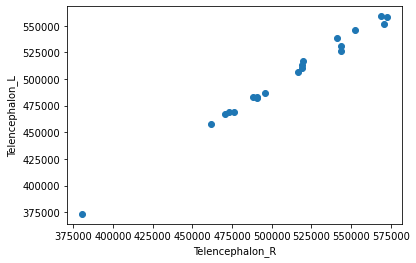

In [8]:
# Draw the figure: the left telencephalon (type 1 level 1) volume by the right
plt.plot(t_r_volumes, t_l_volumes, 'o')
plt.xlabel('Telencephalon_R')
plt.ylabel('Telencephalon_L')
plt.show()

# Q2

In [9]:
# demean
t_l_volumes = t_l_volumes - np.mean(t_l_volumes)
t_r_volumes = t_r_volumes - np.mean(t_r_volumes)

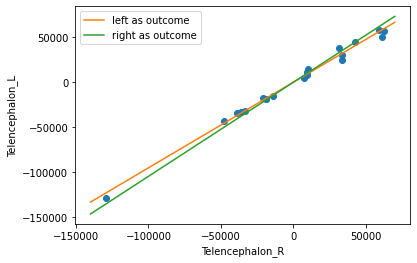

In [10]:
# scatter plot
plt.plot(t_r_volumes, t_l_volumes, 'o')
plt.xlabel('Telencephalon_R')
plt.ylabel('Telencephalon_L')
t = np.array([-140000, 70000])

# left as outcome, right as predicator
k1 = sum(t_l_volumes * t_r_volumes) / sum(t_r_volumes ** 2)
plt.plot(t, t * k1,label='left as outcome')

# right as outcome, left as predicator
k2 = sum(t_l_volumes * t_r_volumes) / sum(t_l_volumes ** 2)
plt.plot(t, t * k2,label='right as outcome')
plt.legend(loc=0,ncol=1)
plt.show()

# Q3
As given, we have a model which conforms:
$$Y=BX$$
and
$$X'=cX$$
Also, we don't change the real value of $Y$, then we actually have
$$Y=B^{'}X'$$
So, we will get $$B'=\frac{1}{c}B$$

# Q4
For vector $y$ and vector $x$ that is a colleciton of 1s and 0s (corresponding to group 1 and group 0, respectively). Let $n_1$, $n_0$ be the number in group 1, 0 and $n=n_1+n_0$. Let $p_1$ be the fraction of observations in group 1, i.e. $\frac{n_1}{n}$ and $p_0=\frac{n_0}{n}$ be the fraction of observations in group 0. Let $\bar{y_1}$ and $\bar{y_0}$ be the means of $y$ in each group and $\bar{y}$ be the overall mean of the $y$. Let $\bar{x}$ be the mean of $x$. Then we can have the following:
$$
\begin{equation}
\bar{x} = \frac{0 * n_0 + 1 * n_1}{n} = \frac{n_1}{n} = p_1 \\
\bar{y} = \frac{\bar{y_0} * n_0 + \bar{y_1} * n_1}{n} = \bar{y_0} \frac{n_0}{n} + \bar{y_1} \frac{n_1}{n} = \bar{y_0} p_0 + \bar{y_1} p_1 \\
\sum_{i=1}^{n}{(x_i - p_1)}^2 = n_1 {(1 - p_1)}^2 + n_0 {p_1}^2 = n_1 {p_0}^2 + n_0 {p_1}^2 = n_1 \frac{{n_0}^2}{n^2} + n_0 \frac{{n_1}^2}{n^2} = \frac{(n_0 + n_1) n_0 n_1}{n^2} = n \frac{n_0}{n} \frac{n_1}{n} = n p_0 p_1
\end{equation}
$$
For a regression model $\hat{y} = \hat{\beta_1} \hat{x} + \hat{\beta_0}$, and let $G_1$ and $G_0$ be the indices for groups 1 and 0, we can have the following:
$$
\begin{align}
\hat{\beta_1} &= \frac{\sum_{i=1}^{n}{(y_i - \bar{y})(x_i - p_1)}}{\sum_{i=1}^{n}{(x_i - p_1)^2}} \\
              &= \frac{\sum_{i \in G_1}^{n}{(y_i - \bar{y})(x_i - p_1)} + \sum_{i \in G_0}^{n}{(y_i - \bar{y})(x_i - p_1)}}{n p_0 p_1} \\
              &= \frac{n_1 (\bar{y_1} - \bar{y})(1 - p_1) + n_0 (\bar{y_0} - \bar{y})(0 - p_1)}{n p_0 p_1} \\
              &= \frac{n_1 p_0 (\bar{y_1} - \bar{y}) - n_0 p_1 (\bar{y_0} - \bar{y})}{n p_0 p_1} \\
              &= (\bar{y_1} - \bar{y}) - (\bar{y_0} - \bar{y}) \\
              &= \bar{y_1} - \bar{y_0}
\end{align}
$$
Also, we have $\bar{y} = \hat{\beta_1} \bar{x} + \hat{\beta_0}$. With the formula we have above, we can have the following:
$$
\begin{align}
\hat{\beta_0} &= \bar{y} - \hat{\beta_1} \bar{x} \\
              &= \bar{y_0} p_0 + \bar{y_1} p_1 - (\bar{y_1} - \bar{y_0}) p_1 \\
              &= (p_0 + p_1) \bar{y_0} \\
              &= \bar{y_0}
\end{align}
$$
In total, we have such a model which conforms $\hat{y} = (\bar{y_1} - \bar{y_0}) \hat{x} + \bar{y_0}$. When $\hat{x} = 0$, we have $\hat{y} = \bar{y_0}$. When $\hat{x} = 1$, we have $\hat{y} = \bar{y_1}$. So, we prove that $\hat{y}$ is the group mean for group 1 if $\hat{x} = 1$ and the group mean for group 0 if $\bar{x} = 0$.

## Q5

In [11]:
def linear_regression(X, Y):
    beta_1 = st.pearsonr(X, Y)[0] * np.std(Y) / np.std(X)
    beta_0 = np.mean(Y) - np.mean(X) * beta_1
    return beta_0, beta_1

## Q6

In [12]:
d_l_data = data[data['roi'] == 'Diencephalon_L']
d_r_data = data[data['roi'] == 'Diencephalon_R']
d_l_volumes = np.array(d_l_data['volume'])
d_r_volumes = np.array(d_r_data['volume'])
# demean
d_l_volumes = d_l_volumes - np.mean(d_l_volumes)
d_r_volumes = d_r_volumes - np.mean(d_r_volumes)

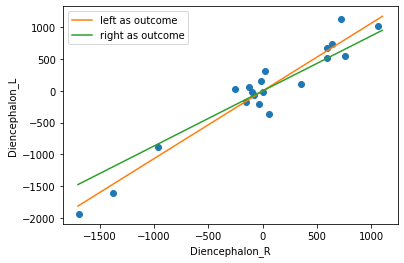

MSE for green line: 2150356.5149192517
MSE for orange line: 1748662.102147758
The best fit is the orange one: left as predicator and right as outcome


In [14]:
# scatter plot
plt.plot(d_r_volumes, d_l_volumes, 'o')
plt.xlabel('Diencephalon_R')
plt.ylabel('Diencephalon_L')
t = np.array([-1700, 1100])
# left as outcome, right as predicator
r_beta_0, r_beta_1 = linear_regression(d_r_volumes, d_l_volumes)
plt.plot(t, t * r_beta_1 + r_beta_0,label='left as outcome')
# right as outcome, left as predicator
l_beta_0, l_beta_1 = linear_regression(d_l_volumes, d_r_volumes)
plt.plot(t, t * l_beta_1 + l_beta_0,label='right as outcome')
plt.legend(loc=0,ncol=1)
plt.show()

print('MSE for green line: ' + str(np.mean((d_l_volumes - r_beta_0 + r_beta_1 * d_r_volumes) ** 2)))
print('MSE for orange line: ' + str(np.mean((d_r_volumes - l_beta_0 + l_beta_1 * d_l_volumes) ** 2)))
print("The best fit is the orange one: left as predicator and right as outcome")

## Q7

# 1.Regressing $Y$ on $X$
After dividing $X$ and $Y$ by their standard deviations, we can have such a model:
$$\frac{Y}{SD_Y}={\beta_1} \frac{X}{SD_X} + \beta_0$$
So, we can transform it into:
$$Y={\beta_1}\frac{SD_Y}{SD_X} X + SD_Y \beta_0$$
Also, we have a solution for ${\beta_1}\frac{SD_Y}{SD_X}$ in the lecture that:
$${\beta_1}\frac{SD_Y}{SD_X} = Cor(X, Y) \frac{SD_Y}{SD_X}$$
Finally, we can get:
$$\beta_1=Cor(X, Y)$$
which means that the slope is simply the correlation.

# 2.Regressing $X$ on $Y$
After dividing $X$ and $Y$ by their standard deviations, we can have such a model:
$$\frac{X}{SD_X}={\beta_1} \frac{Y}{SD_Y} + \beta_0$$
So, we can transform it into:
$$X={\beta_1}\frac{SD_X}{SD_Y} Y + SD_X \beta_0$$
Also, we have a solution for ${\beta_1}\frac{SD_X}{SD_Y}$ in the lecture that:
$${\beta_1}\frac{SD_X}{SD_Y} = Cor(Y, X) \frac{SD_X}{SD_Y}$$
Finally, we can get:
$$\beta_1=Cor(Y, X)$$
which means that the slope is also simply the correlation.